In [ ]:
#Python Program to fit a support vector classifier for a given data set

In [ ]:
#Theory
'''
Eg:
Suppose you're trying to classify emails as spam or not spam. SVC is like drawing a boundary line between the spam and
non-spam emails in a way that maximizes the distance between the two groups.
This boundary helps you accurately classify new emails as spam or not spam.

Question: What is a Support Vector Classifier (SVC)?
Answer: A Support Vector Classifier (SVC) is a supervised machine learning algorithm used for classification tasks.
It works by finding the hyperplane that best separates the classes in the feature space.

Question: How does an SVC work?
Answer: An SVC works by finding the hyperplane that maximizes the margin between the classes in the feature space.
It aims to find the decision boundary that best separates the data points into different classes while minimizing classification errors.

Question: What are support vectors?
Answer: Support vectors are the data points that lie closest to the decision boundary (hyperplane) between the classes.
They play a crucial role in defining the decision boundary and are used to optimize the margin in an SVC.

Question: What is the kernel trick in SVMs, and why is it important?
Answer: The kernel trick is a method used to transform the input features into a higher-dimensional space without
explicitly calculating the transformed features. This allows SVMs to find non-linear decision boundaries in the original feature space.
 It's important because it enables SVMs to handle complex datasets that are not linearly separable.

Question: How do you choose the appropriate kernel for an SVC?
Answer: The choice of kernel depends on the nature of the data and the problem at hand. The linear kernel is suitable for
linearly separable data, while non-linear kernels like polynomial and radial basis function (RBF) are used for non-linearly separable data.
Experimentation and cross-validation can help determine the best kernel for a given dataset.

Question: What is regularization in an SVC?
Answer: Regularization in an SVC is a technique used to prevent overfitting by penalizing large coefficients in the decision function.
It helps to find a balance between maximizing the margin and minimizing classification errors.

Question: How do you evaluate the performance of an SVC?
Answer: The performance of an SVC can be evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score.
 Additionally, techniques like cross-validation can be used to assess the model's generalization performance and tune hyperparameters.

Question: Can an SVC handle multi-class classification tasks?
Answer: Yes, an SVC can handle multi-class classification tasks through techniques like one-vs-one or one-vs-rest classification.
In one-vs-one, a separate binary classifier is trained for each pair of classes, while in one-vs-rest, a separate binary classifier is trained
for each class against the rest.
'''

In [ ]:
#1
#import necessary libraries
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# generate sample data
x, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# initialize Support Vector Classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Make predictions on testing data
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.95


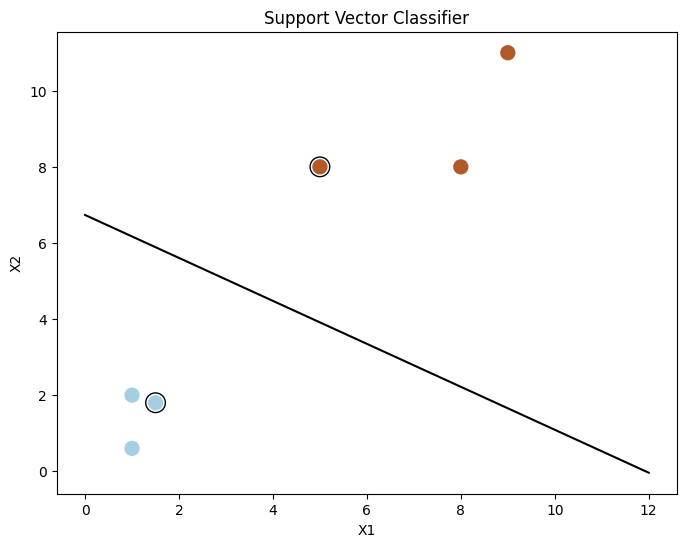

In [ ]:
#2
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Sample data
x = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])
y = [0, 1, 0, 1, 0, 1]

# Define the SVM model
clf = svm.SVC(kernel='linear')

# Fit the model
clf.fit(x, y)

# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 12)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the data and the hyperplane
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)
plt.plot(xx, yy, 'k-')
plt.title("Support Vector Classifier")
plt.xlabel("X1")
plt.ylabel("X2")

# Highlight the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')
plt.show()


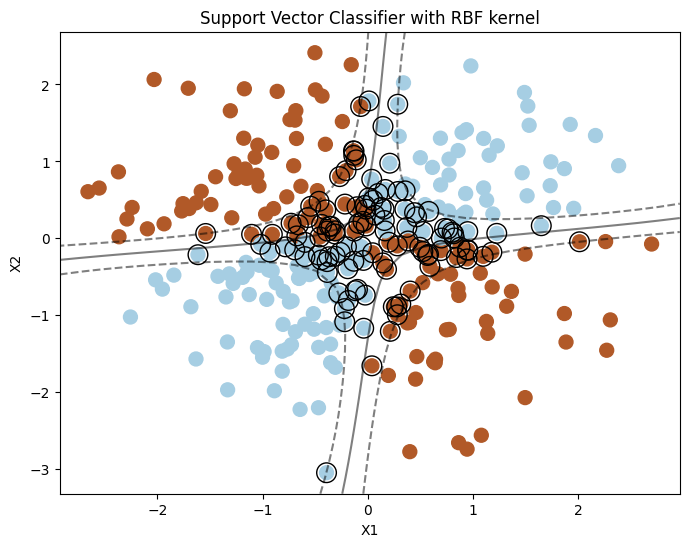

In [ ]:
#3
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate sample data
np.random.seed(0)
x = np.random.randn(300, 2)
y = np.logical_xor(x[:, 0] > 0, x[:, 1] > 0)

# Define the SVM model with radial basis function (RBF) kernel
clf = svm.SVC(kernel='rbf', gamma=0.1, C=10)

# Fit the model
clf.fit(x, y)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, linewidth=1, facecolors='none', edgecolors='k')

plt.title("Support Vector Classifier with RBF kernel")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


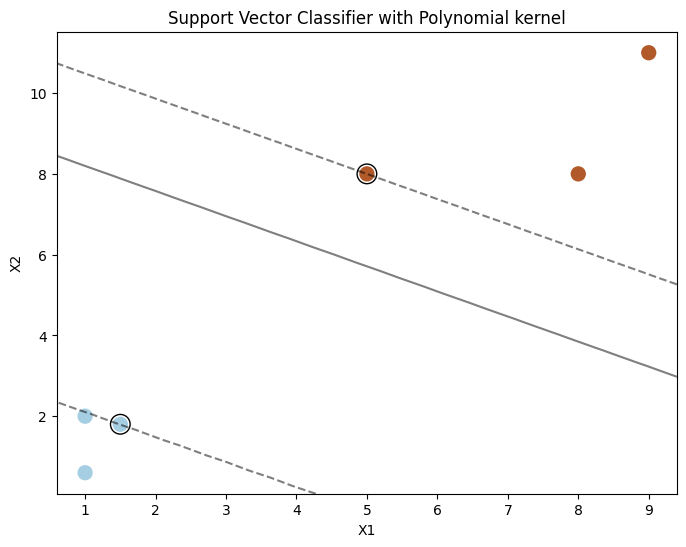

In [ ]:
#4
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Sample data
x = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])
y = [0, 1, 0, 1, 0, 1]

# Define the SVM model with a polynomial kernel
clf = svm.SVC(kernel='poly', degree=3, gamma='auto', coef0=1)

# Fit the model
clf.fit(x, y)

# Plot the decision function
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# Plot the decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, linewidth=1, facecolors='none', edgecolors='k')

plt.title("Support Vector Classifier with Polynomial kernel")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


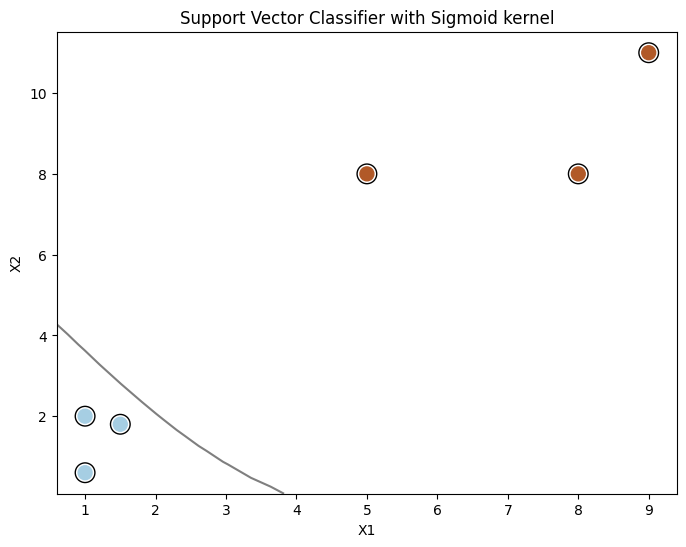

In [ ]:
#5
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Sample data
x = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])
y = [0, 1, 0, 1, 0, 1]

# Define the SVM model with a sigmoid kernel
clf = svm.SVC(kernel='sigmoid', gamma='auto', coef0=1)

# Fit the model
clf.fit(x, y)

# Plot the decision function
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# Plot the decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, linewidth=1, facecolors='none', edgecolors='k')

plt.title("Support Vector Classifier with Sigmoid kernel")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
